# Travelling Salesperson Problem solved using genetic algorithms

In [49]:
# Imports
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3

In [3]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [48, 64],
 'London': [38, 73],
 'Moscow': [58, 38],
 'Barcelona': [14, 64],
 'Rome': [15, 73],
 'Paris': [2, 68],
 'Vienna': [66, 23],
 'Munich': [64, 64],
 'Istanbul': [13, 32],
 'Kyiv': [99, 85],
 'Bucharest': [2, 69],
 'Minsk': [75, 57],
 'Warsaw': [12, 11],
 'Budapest': [4, 91],
 'Milan': [79, 10],
 'Prague': [10, 11],
 'Sofia': [82, 13],
 'Birmingham': [12, 6],
 'Brussels': [37, 23],
 'Amsterdam': [75, 51]}

## 1. Create the first population set
We randomly shuffle the cities N times where N=population_size

In [4]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['Bucharest', 'Istanbul', 'Kyiv', ..., 'London', 'Berlin',
        'Vienna'],
       ['Minsk', 'Brussels', 'Birmingham', ..., 'Vienna', 'Kyiv',
        'Milan'],
       ['Bucharest', 'Munich', 'Rome', ..., 'Budapest', 'Milan',
        'Brussels'],
       ...,
       ['Prague', 'Munich', 'Budapest', ..., 'Berlin', 'Sofia', 'Warsaw'],
       ['Milan', 'Warsaw', 'Moscow', ..., 'Paris', 'Brussels', 'Berlin'],
       ['Bucharest', 'Birmingham', 'Vienna', ..., 'Amsterdam',
        'Istanbul', 'Budapest']], dtype='<U10')

## 2. Evaluate solutions fitness
The solutions are defined so that the first element on the list is the first city to visit, then the second, etc. and the last city is linked to the first.
The fitness function needs to compute the distance between subsequent cities.

In [5]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [11]:
cities_dict

{'Berlin': [48, 64],
 'London': [38, 73],
 'Moscow': [58, 38],
 'Barcelona': [14, 64],
 'Rome': [15, 73],
 'Paris': [2, 68],
 'Vienna': [66, 23],
 'Munich': [64, 64],
 'Istanbul': [13, 32],
 'Kyiv': [99, 85],
 'Bucharest': [2, 69],
 'Minsk': [75, 57],
 'Warsaw': [12, 11],
 'Budapest': [4, 91],
 'Milan': [79, 10],
 'Prague': [10, 11],
 'Sofia': [82, 13],
 'Birmingham': [12, 6],
 'Brussels': [37, 23],
 'Amsterdam': [75, 51]}

In [12]:
population_set

array([['Bucharest', 'Istanbul', 'Kyiv', ..., 'London', 'Berlin',
        'Vienna'],
       ['Minsk', 'Brussels', 'Birmingham', ..., 'Vienna', 'Kyiv',
        'Milan'],
       ['Bucharest', 'Munich', 'Rome', ..., 'Budapest', 'Milan',
        'Brussels'],
       ...,
       ['Prague', 'Munich', 'Budapest', ..., 'Berlin', 'Sofia', 'Warsaw'],
       ['Milan', 'Warsaw', 'Moscow', ..., 'Paris', 'Brussels', 'Berlin'],
       ['Bucharest', 'Birmingham', 'Vienna', ..., 'Amsterdam',
        'Istanbul', 'Budapest']], dtype='<U10')

In [6]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([1022.94153297,  987.92410393, 1060.94562046, 1093.35224911,
       1116.97499648, 1027.61965468, 1188.67375857,  994.67191606,
       1054.9632473 , 1088.8897465 , 1088.24803324, 1020.97899359,
       1030.50617126, 1128.52032712, 1084.66476735,  802.74518807,
       1210.12932547,  986.92344535,  882.72075942, 1123.05851174,
       1135.20850573, 1154.67119319,  942.81866701, 1027.70136622,
       1160.71550115, 1023.97230836, 1149.84010397, 1001.78166892,
        989.63831677,  988.39333994, 1146.93542444, 1121.7455425 ,
       1101.11362525, 1095.05932794,  962.40667292, 1072.36855154,
       1047.47978974,  908.26918572, 1136.90928709,  860.03197634,
       1296.10345705, 1120.15642808, 1030.56656408, 1001.47485377,
       1102.18407999, 1126.07226457,  926.37991947,  926.58331925,
       1063.67922231, 1091.00836414, 1108.28627142,  868.83271058,
       1139.94890179,  852.62739602, 1038.17836856, 1078.23675586,
       1026.50802694,  874.47673038, 1150.27275225, 1158.22195

# 3. Progenitors selection
I will select a new set of progenitors using the Roulette Wheel Selection. Generates a list of progenitor pairs where N= len(population_set) but at each position there are two solutions to merge

In [140]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit

    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['Amsterdam', 'Minsk', 'Birmingham', 'Warsaw', 'Bucharest',
       'Berlin', 'Paris', 'Istanbul', 'Barcelona', 'Kyiv', 'Munich',
       'Moscow', 'Budapest', 'London', 'Brussels', 'Milan', 'Vienna',
       'Prague', 'Rome', 'Sofia'], dtype='<U10')

# 4. Mating
For each pair of  parents we'll generate an offspring pair. Since we cannot repeat cities what we'll do is copy a random chunk from one progenitor and fill the blanks with the other progenitor.

In [33]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring



def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Prague', 'Rome', 'Moscow', 'Amsterdam', 'Milan', 'Bucharest',
       'Munich', 'London', 'Minsk', 'Birmingham', 'Vienna', 'Kyiv',
       'Barcelona', 'Paris', 'Warsaw', 'Berlin', 'Istanbul', 'Sofia',
       'Budapest', 'Brussels'], dtype='<U10')

# 5. Mutation
Now for each element of the new population we add a random chance of swapping

In [34]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Prague', 'Bucharest', 'Rome', 'Milan', 'Amsterdam', 'Moscow',
       'Munich', 'Istanbul', 'Minsk', 'Birmingham', 'Vienna', 'Warsaw',
       'Barcelona', 'Paris', 'Kyiv', 'Brussels', 'London', 'Sofia',
       'Budapest', 'Berlin'], dtype='<U10')

# 6. Stopping
To select the stopping criteria we'll need to create a loop to stop first. Then I'll set it to loop at 1000 iterations.

In [111]:
best_solution = [-1,np.inf,np.array([])]
generaciones=10000
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%100==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())


    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)

In [80]:
best_solution

[8159,
 542.7301850902467,
 array([['Prague', 'Warsaw', 'Birmingham', 'Istanbul', 'Kyiv', 'Munich',
         'Moscow', 'Amsterdam', 'Berlin', 'Brussels', 'Vienna', 'Milan',
         'Sofia', 'Minsk', 'London', 'Paris', 'Budapest', 'Barcelona',
         'Rome', 'Bucharest']], dtype='<U10')]

# 7. Laboratory
To make a real analysis about what is going on whit this problem, we change the selection method, but first we define a function to graph the results

In [110]:
def graficar(x, y, titulo="", etiqueta_x="", etiqueta_y="",tipo=int):

    plt.plot(x, y,'o',label=etiqueta_y)

    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    if tipo==0:
      min_y = min(y)
      min_y_index = y.index(min_y)

    # Destaca el valor mínimo agregando un círculo rojo y un texto
      plt.plot(x[min_y_index], min_y, 'ro')  # Círculo rojo en el valor mínimo
      plt.text(x[min_y_index], min_y, f'Minimum total: {min_y}', fontsize=7, ha='right', va='bottom')

    plt.grid(True)

    plt.show()

## 7.1 Graphics Roulette method
We change the number of generations
### 7.1.1 10.000 Gens


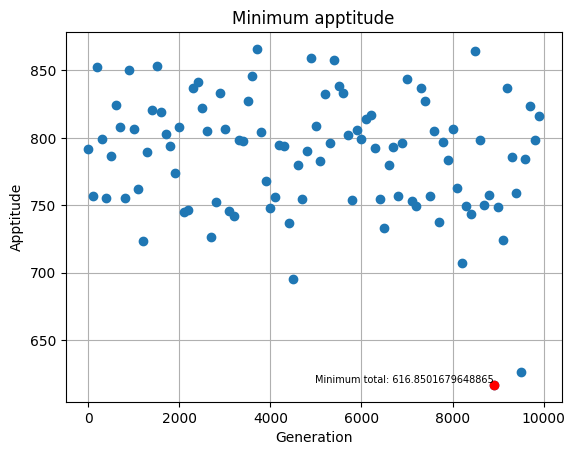

In [113]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

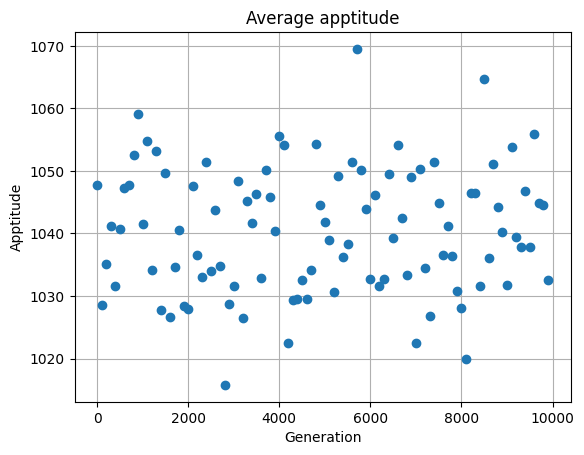

In [114]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)

### 7.1.2 1.000 Gens

In [115]:
best_solution = [-1,np.inf,np.array([])]
generaciones=1000
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%50==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())
      print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))

    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)

    mutated_pop = mutate_population(new_population_set)

0 783.9564639676944 1038.2804992934143 23/09/23 00:37
50 834.3410447227492 1026.100789063284 23/09/23 00:37
100 850.952469443911 1046.6491105487053 23/09/23 00:37
150 812.3665577375515 1034.0339531881104 23/09/23 00:37
200 784.2593400797114 1049.6353969553018 23/09/23 00:37
250 811.0244746992807 1043.9710885843722 23/09/23 00:37
300 819.6604141417099 1045.8699463664866 23/09/23 00:37
350 700.9448233141766 1030.2759820257584 23/09/23 00:37
400 740.0960776261309 1037.8189787298982 23/09/23 00:37
450 836.6755640235393 1048.0765850847865 23/09/23 00:37
500 806.530196004175 1039.2844205581448 23/09/23 00:37
550 807.8510286496535 1010.3581954643379 23/09/23 00:37
600 748.3778059778149 1028.8836096140183 23/09/23 00:37
650 727.289942058057 1043.012739965007 23/09/23 00:37
700 829.9589314186398 1029.4916028657242 23/09/23 00:37
750 763.6018008358562 1032.7794309684352 23/09/23 00:37
800 859.2221923179734 1057.2604167782563 23/09/23 00:37
850 753.8509033811789 1043.8635955204477 23/09/23 00:37


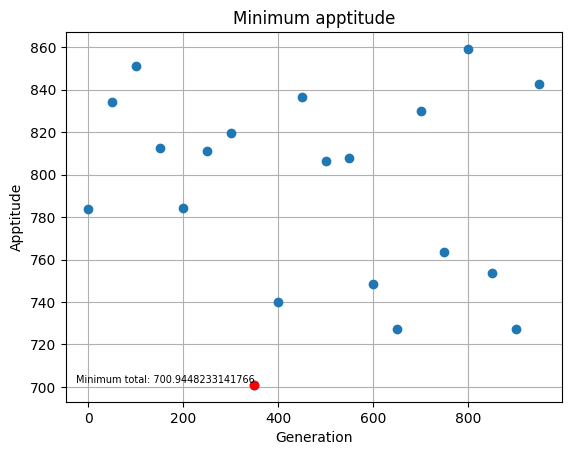

In [116]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

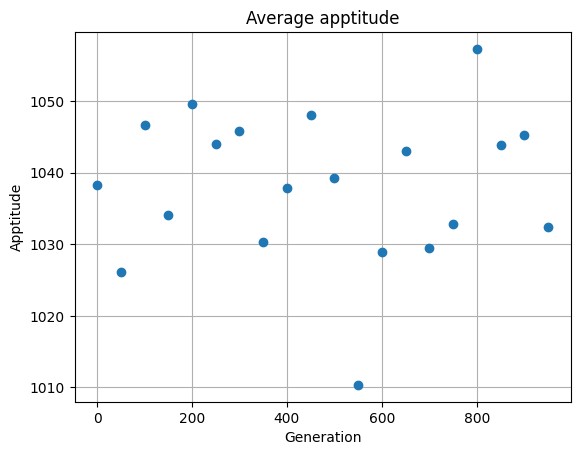

In [117]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)

### 7.1.3 500 Gens

In [118]:
best_solution = [-1,np.inf,np.array([])]
generaciones=500
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%50==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())
      print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))

    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)

    mutated_pop = mutate_population(new_population_set)

0 703.4331985134706 1037.5353785415653 23/09/23 00:37
50 780.8782140241539 1043.3946878104516 23/09/23 00:38
100 775.4362904812705 1045.1195864338504 23/09/23 00:38
150 771.9454369457046 1044.0222920233518 23/09/23 00:38
200 794.6358604349981 1043.4684971236027 23/09/23 00:38
250 786.5815636221186 1032.3963983707647 23/09/23 00:38
300 839.9060713491527 1045.377490376677 23/09/23 00:38
350 770.7778999257732 1032.3841028045617 23/09/23 00:38
400 784.4230562721912 1046.3757179026527 23/09/23 00:38
450 789.8394719131005 1047.9388816734263 23/09/23 00:38


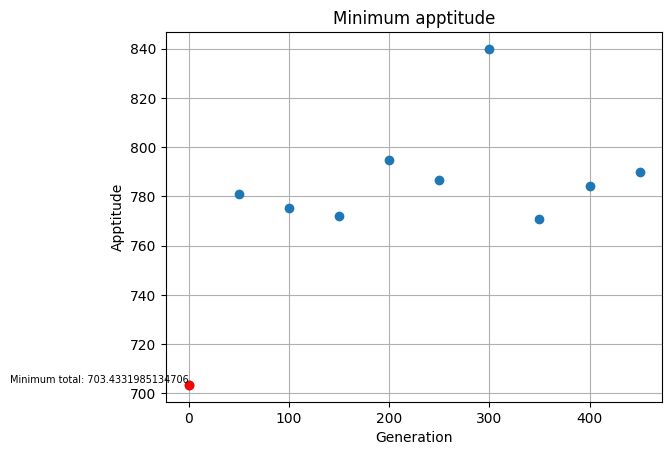

In [119]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

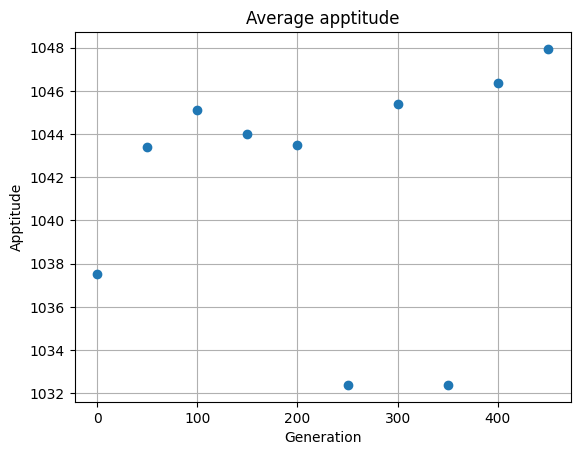

In [120]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)

## 7.2 Tournament Selection
We change the selection type to a tournament selection, In tournament selection, several individuals are randomly selected from the population and their fitness is compared. The fittest individual among those selected is chosen as the parent. This process is repeated several times to select the parents of the next generation


In [162]:

def tournament_selection(population_set,fitnes_list,tournament_size):
    parents=0
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    groups = [fitnes_list[i:i+10] for i in range(0, len(fitnes_list), 10)]
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = []
    progenitor_list_b = []
    for _ in range(len(population_set)):
        # Elegir dos individuos aleatoriamente para el torneo
        tournament_indices = np.random.choice(len(population_set), size=10, replace=False)
        tournament_fitness = [fitnes_list[i] for i in tournament_indices]

        # Seleccionar al individuo con la aptitud más alta en el torneo como progenitor A
        progenitor_a_index = tournament_indices[np.argmax(tournament_fitness)]
        progenitor_list_a.append(population_set[progenitor_a_index])

        # Elegir nuevamente a los participantes para el torneo (puede ser el mismo individuo)
        tournament_indices = np.random.choice(len(population_set), size=10, replace=False)
        tournament_fitness = [fitnes_list[i] for i in tournament_indices]

        # Seleccionar al individuo con la aptitud más alta en el torneo como progenitor B
        progenitor_b_index = tournament_indices[np.argmax(tournament_fitness)]
        progenitor_list_b.append(population_set[progenitor_b_index])

    return np.array([progenitor_list_a, progenitor_list_b])



progenitor_list = tournament_selection(population_set,fitnes_list,7)
progenitor_list

array([['Sofia', 'Bucharest', 'Paris', ..., 'Amsterdam', 'Berlin',
        'Warsaw'],
       ['Kyiv', 'Barcelona', 'Milan', ..., 'Amsterdam', 'Prague',
        'Berlin'],
       ['Berlin', 'Brussels', 'Moscow', ..., 'Birmingham', 'Sofia',
        'Istanbul'],
       ...,
       ['Kyiv', 'Barcelona', 'Milan', ..., 'Amsterdam', 'Prague',
        'Berlin'],
       ['Rome', 'Vienna', 'Istanbul', ..., 'Paris', 'Bucharest',
        'Birmingham'],
       ['London', 'Rome', 'Birmingham', ..., 'Budapest', 'Milan',
        'Prague']], dtype='<U10')


##We change the number of generations
### 7.2.1 10.000 Gens Tournament selection

In [167]:
best_solution = [-1,np.inf,np.array([])]
generaciones=10000
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%100==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())


    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = tournament_selection(population_set,fitnes_list,7)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)


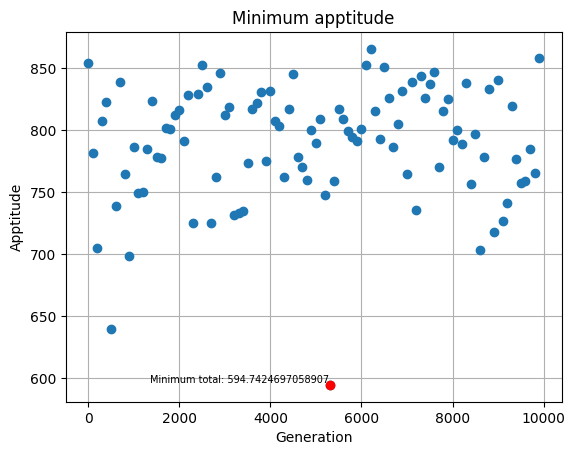

In [168]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

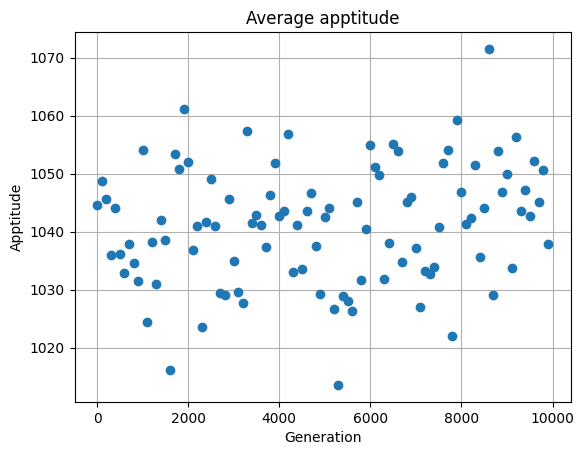

In [169]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)



### 7.2.2 1.000 Gens Tournament selection

In [173]:
best_solution = [-1,np.inf,np.array([])]
generaciones=1000
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%50==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())


    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = tournament_selection(population_set,fitnes_list,7)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)


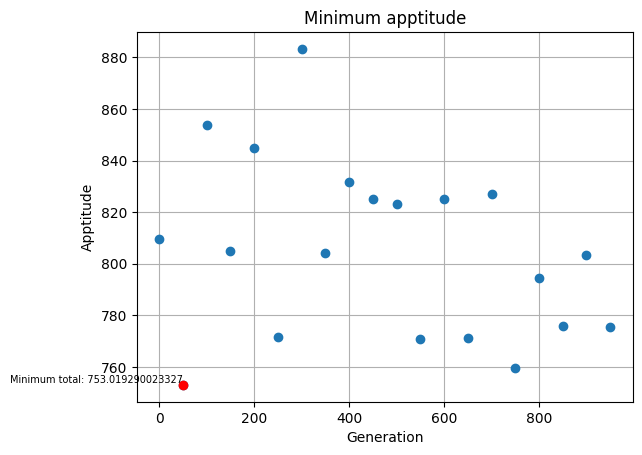

In [174]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

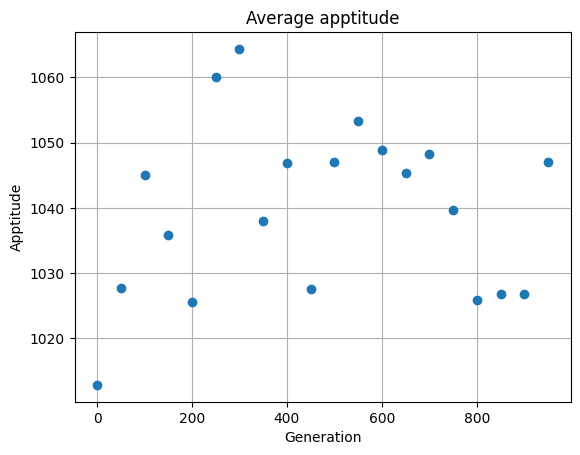

In [175]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)


##We change the number of generations
### 7.2.3 500 Gens Tournament selection

In [176]:
best_solution = [-1,np.inf,np.array([])]
generaciones=500
generacion=[]
minimos=[]
medias=[]
for i in range(generaciones):
    if i%50==0:
      generacion.append(i)
      minimos.append(fitnes_list.min())
      medias.append(fitnes_list.mean())


    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = tournament_selection(population_set,fitnes_list,7)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)


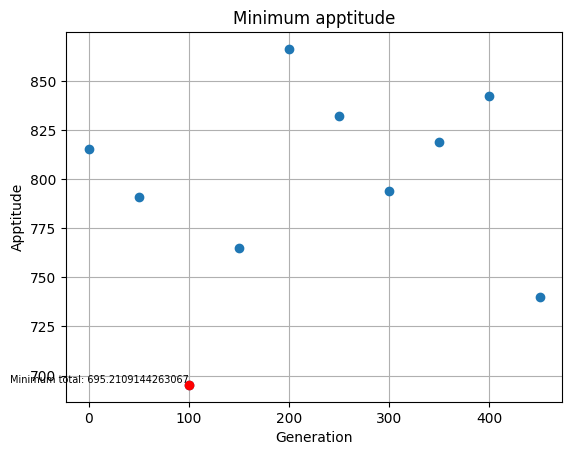

In [177]:
graficar(generacion, minimos, "Minimum apptitude", "Generation", "Apptitude",0)

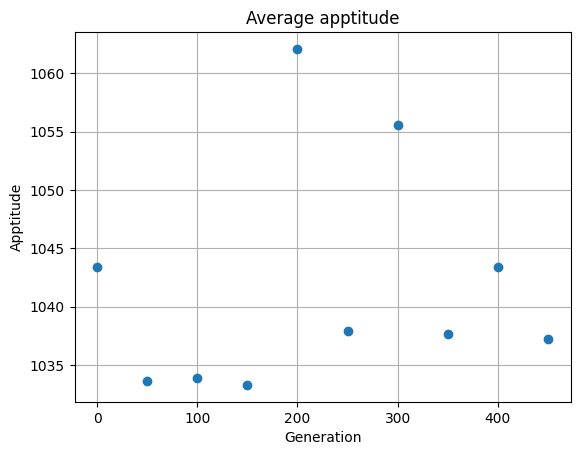

In [178]:
graficar(generacion,medias, "Average apptitude", "Generation", "Apptitude",1)